In [1]:
#filename : pj03_concat3.ipynb

################ 2022-12-06
# 수정05 (진해중) 
# 네이버 평점, 관객 감정 평점



############### 2022-12-06 khm

# 수정 01 (완료)
# 데이터 제목, 오프닝 중복 제거 (2년치 데이터 붙이면서 중복되는 데이터 제거)
# 중복값 제거, 마지막 항목만 남김 ( 먼저 개봉한 )
# df_dup = df_con.drop_duplicates(subset=['title', 'opening_date'], keep='last')

# 수정 02 (완료)
# 2010 년 이후 ~ 2019 년 이하 데이터만 남김
#df_time = df_dup[(df_dup['opening_date'] >= '2010-01-01') & (df_dup['opening_date'] < '2020-01-01')]

# 수정 03 (진행중) 
# 감독지수(완료), 배우지수

# 수정 04 (진행중)
# 왓차피디아 평점, SNS 지수 (오류로 멈춤)



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 전처리

In [3]:
def df_clear(data):
    df = data 
    df.columns = ['ranking', 'title', 'opening_date', 'sales',
             'sales_percent', 'sum_sales', 'audience', 'sum_audience', 
            'screens', 'shows', 'main_nation', 'nation', 
              'producer', 'distributor', 'rated', 
              'genre', 'director', 'actor'] 
    df.drop(columns=['ranking', 'sales', 'sales_percent', 'audience', 'nation'], inplace=True) # 필요없는 필드 제거
    df.dropna(subset=['opening_date','genre','director','actor'], inplace=True) # NaN 결측치 제거
    df = df[~df['genre'].str.contains('성인물', na=False)] # 성인물 장르 제거
    df.fillna(value={'rated':'전체관람가'}, inplace=True) # 등급 - 전체관람가 채우기
    return df

#### 데이터 불러오기

In [4]:
df = pd.read_excel('./data/KOBIS_기간별박스오피스_2018-01-01_2019-12-31.xlsx')
df.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,극한직업,2019-01-23,139651845516,0.039,139651845516,16265618,16265618,2003,292584,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,2,어벤져스: 엔드게임,2019-04-24,122182694160,0.034,122182694160,13934592,13934592,2835,242001,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [5]:
df.shape

(6530, 18)

In [6]:
data1 = df_clear(df)
data1.shape

(1634, 13)

In [7]:
data1.head(1)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."


In [8]:
df2 = pd.read_excel('./data/KOBIS_기간별박스오피스_2016-01-01_2017-12-31.xlsx')
df2.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,택시운전사,2017-08-02,95853645649,0.029,95853645649,12186327,12186327,1906,184075,한국,한국,더램프(주),(주)쇼박스,15세이상관람가,드라마,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송..."
1,2,부산행,2016-07-20,93182579048,0.028,93182579048,11566862,11566862,1788,151350,한국,한국,(주)영화사레드피터,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,스릴러",연상호,"공유,김정희,정유미,김율호,이주원,이영욱,마동석,김찬호,김운,최우식,안소희,김의성,..."


In [9]:
df2.shape

(5865, 18)

In [10]:
data2 = df_clear(df2)
data2.shape

(2002, 13)

In [11]:
df3 = pd.read_excel('./data/KOBIS_기간별박스오피스_2014-01-01_2015-12-31.xlsx')
df3.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,명량,2014-07-30,135753219310,0.043,135753219310,17615039,17615039,1587,188646,한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,15세이상관람가,"사극,액션",김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,..."
1,2,국제시장,2014-12-17,110930943730,0.035,110930943730,14261581,14261581,1044,212664,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지..."


In [12]:
data3 = df_clear(df3)
data3.shape

(1753, 13)

In [13]:
df4 = pd.read_excel('./data/KOBIS_기간별박스오피스_2012-01-01_2013-12-31.xlsx')
df4.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,도둑들,2012-07-25,93665568500,0.032,93665568500,12983330,12983330,1091,155393,한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,15세이상관람가,"액션,범죄",최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동..."
1,2,7번방의 선물,2013-01-23,91431914670,0.031,91431914670,12811206,12811206,866,166815,한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"코미디,드라마",이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동..."


In [14]:
data4 = df_clear(df4)
data4.shape

(1236, 13)

In [15]:
df5 = pd.read_excel('./data/KOBIS_기간별박스오피스_2010-01-01_2011-12-31.xlsx')
df5.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,트랜스포머 3,2011-06-29,74840681500,0.034,74840681500,7784743,7784743,1409,124450,미국,미국,NaN,(주)씨제이이엔엠,12세이상관람가,"액션,어드벤처",마이클 베이,"조쉬 더하멜,존 말코비치,로지 헌팅턴-휘틀리,샤이아 라보프,패트릭 뎀시"
1,2,최종병기 활,2011-08-10,55827861500,0.025,55827861500,7470633,7470633,615,130054,한국,한국,"(주)디씨지플러스,(주)다세포클럽",롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"사극,액션",김한민,"박해일,류승룡,김무열,문채원,이한위,김구택,이경영,박기웅,이승준,이재구,박노식,이다..."


In [16]:
data5 = df_clear(df5)
data5.shape

(725, 13)

## 데이터 합치기

In [17]:
df_con = pd.concat([data1, data2, data3, data4, data5])
df_con.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [18]:
df_con.shape

(7350, 13)

In [19]:
#데이터 검증
#df_con.to_excel('data_con.xlsx', index=False)

In [20]:
df_con.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프"
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧"
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용..."


In [21]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7350 entries, 0 to 2360
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7350 non-null   object        
 1   opening_date  7350 non-null   datetime64[ns]
 2   sum_sales     7350 non-null   int64         
 3   sum_audience  7350 non-null   int64         
 4   screens       7350 non-null   int64         
 5   shows         7350 non-null   int64         
 6   main_nation   7350 non-null   object        
 7   producer      3103 non-null   object        
 8   distributor   6134 non-null   object        
 9   rated         7350 non-null   object        
 10  genre         7350 non-null   object        
 11  director      7350 non-null   object        
 12  actor         7350 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 803.9+ KB


## 데이터 제목, 오프닝 중복 제거 (2년치 데이터 붙이면서 중복되는 데이터 제거)

In [22]:
# 중복값 확인
df_con[df_con.duplicated(subset=['title', 'opening_date'], keep=False)].groupby('title').count()

,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
title,,,,,,,,,,,,
1987,2,2,2,2,2,2,2,2,2,2,2,2
2012,2,2,2,2,2,2,2,2,2,2,2,2
007 스펙터,2,2,2,2,2,2,0,2,2,2,2,2
127시간,2,2,2,2,2,2,0,2,2,2,2,2
12인의 하숙생,3,3,3,3,3,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
흑룡강,3,3,3,3,3,3,3,0,3,3,3,3
희생,4,4,4,4,4,4,4,0,4,4,4,4
히마와리와 나의 7일,2,2,2,2,2,2,0,2,2,2,2,2


In [23]:
# 중복값 제거, 마지막 항목만 남김 ( 먼저 개봉한 )
df_dup = df_con.drop_duplicates(subset=['title', 'opening_date'], keep='last')

In [24]:
# 중복 값 확인. 없어야 정상
df_dup[df_dup.duplicated(subset=['title', 'opening_date'], keep=False)].groupby('title').count()

,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
title,,,,,,,,,,,,


In [25]:
df_dup.shape

(5974, 13)

In [26]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 2360
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         5974 non-null   object        
 1   opening_date  5974 non-null   datetime64[ns]
 2   sum_sales     5974 non-null   int64         
 3   sum_audience  5974 non-null   int64         
 4   screens       5974 non-null   int64         
 5   shows         5974 non-null   int64         
 6   main_nation   5974 non-null   object        
 7   producer      2282 non-null   object        
 8   distributor   5174 non-null   object        
 9   rated         5974 non-null   object        
 10  genre         5974 non-null   object        
 11  director      5974 non-null   object        
 12  actor         5974 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 653.4+ KB


In [27]:
df_dup[['title']].value_counts(ascending=True)

title       
33              1
욕망의 쉐어하우스       1
욕망의 라쇼몽 무삭제판    1
욕망의 독: 중독       1
욕망의 대지          1
               ..
유혹              3
카운트다운           3
미녀와 야수          3
몬스터             3
로미오와 줄리엣        3
Length: 5889, dtype: int64

## 2010 년 이후 ~ 2019 년 이하 데이터만 남김

In [28]:
df_time = df_dup[(df_dup['opening_date'] >= '2010-01-01') & (df_dup['opening_date'] < '2020-01-01')]
df_time.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [29]:
#데이터 검증
#df_dup.to_excel('data_dup.xlsx', index=False)

## 10,000 명 미만 관람객수 제거

In [30]:
data = df_time[df_time['sum_audience'] >= 10**4]
data.shape

(1642, 13)

In [31]:
data.reset_index(drop=True, inplace=True)

## 년도 만들기

In [32]:
data['year'] = data.opening_date.dt.year
data.head(5)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2019
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2019
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2019
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧",2019
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",2018


In [33]:
#데이터 검증
#data.to_excel('data_mv.xlsx', index=False)

## 감독 지수

In [34]:
dir_data = data

In [35]:
dir_data['dir_pre_cnt'] = int(0) # 이전 작품 수
dir_data['dir_pre_aud'] = dir_data['sum_audience'] # 이전 누적 관객수

In [36]:
dir_count = dir_data[['title','director']].groupby('director').count()
dir_count = dir_count.reset_index()
dir_count

,director,title
0,D.J. 카루소,2
1,F. 게리 그레이,3
2,J 블레이크슨,1
3,J.J. 에이브럼스,3
4,M. 나이트 샤말란,5
...,...,...
1114,후안 안토니오 바요나,2
1115,후쿠다 유이치,1
1116,히라야마 미호,1
1117,히라오 타카유키,1


In [37]:
dir_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  1119 non-null   object
 1   title     1119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.6+ KB


In [38]:
dir_pre_data = dir_data.sort_values(by=['director','title', 'opening_date'])
dir_pre_data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud
1401,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,"액션,SF",D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",2011,0,654386
468,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"액션,어드벤처,스릴러",D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",2017,0,475309


In [39]:
dir_pre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 1401 to 301
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         1642 non-null   object        
 1   opening_date  1642 non-null   datetime64[ns]
 2   sum_sales     1642 non-null   int64         
 3   sum_audience  1642 non-null   int64         
 4   screens       1642 non-null   int64         
 5   shows         1642 non-null   int64         
 6   main_nation   1642 non-null   object        
 7   producer      731 non-null    object        
 8   distributor   1642 non-null   object        
 9   rated         1642 non-null   object        
 10  genre         1642 non-null   object        
 11  director      1642 non-null   object        
 12  actor         1642 non-null   object        
 13  year          1642 non-null   int64         
 14  dir_pre_cnt   1642 non-null   int64         
 15  dir_pre_aud   1642 non-null   int64 

In [40]:
dir_count.loc[0,['director']]

director    D.J. 카루소
Name: 0, dtype: object

In [41]:
tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
idx_list = list(tmp_data.index)
idx_list

[1401, 468]

In [42]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1401 to 468
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         2 non-null      object        
 1   opening_date  2 non-null      datetime64[ns]
 2   sum_sales     2 non-null      int64         
 3   sum_audience  2 non-null      int64         
 4   screens       2 non-null      int64         
 5   shows         2 non-null      int64         
 6   main_nation   2 non-null      object        
 7   producer      0 non-null      object        
 8   distributor   2 non-null      object        
 9   rated         2 non-null      object        
 10  genre         2 non-null      object        
 11  director      2 non-null      object        
 12  actor         2 non-null      object        
 13  year          2 non-null      int64         
 14  dir_pre_cnt   2 non-null      int64         
 15  dir_pre_aud   2 non-null      int64    

In [43]:
def dir_pre_add(dir_count, dir_pre_data):
    for i in range(0, len(dir_count)):
        name     = dir_count.loc[i,'director']
        count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
        tmp_data = dir_pre_data[dir_pre_data['director']==name].sort_values(by=['opening_date'])
        #print(f'name: {name}, count: {count}')
        k = 0
        if (count == len(tmp_data)):
            for j in range(0, len(tmp_data)):
                # if j == 0:
                #     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
                # else :
                if j > 0 :
                    tmp_data.iloc[j,14] = j
                    tmp_data.iloc[j,15] = tmp_data.iloc[j]['dir_pre_aud'] + tmp_data.iloc[j-1]['dir_pre_aud']
                    print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
        idx_list = list(tmp_data.index)
        #print(idx_list)
        for i, idx in enumerate(idx_list):
            # print(i, idx, dir_pre_data.loc[idx,'dir_pre_cnt'], tmp_data.iloc[i]['dir_pre_cnt'],
            #       dir_pre_data.loc[idx,'dir_pre_aud'], tmp_data.iloc[i]['dir_pre_aud'])
            dir_pre_data.loc[idx,'dir_pre_cnt'] = tmp_data.iloc[i]['dir_pre_cnt']
            dir_pre_data.loc[idx,'dir_pre_aud'] = tmp_data.iloc[i]['dir_pre_aud']

In [44]:
# 감독 지수 만들기
dir_pre_add(dir_count, dir_pre_data)

name:D.J. 카루소, idx: 1, dir_pre_cnt:1, dir_pre_aud:1129695
name:F. 게리 그레이, idx: 1, dir_pre_cnt:1, dir_pre_aud:3702082
name:F. 게리 그레이, idx: 2, dir_pre_cnt:2, dir_pre_aud:4553999
name:J.J. 에이브럼스, idx: 1, dir_pre_cnt:1, dir_pre_aud:2077396
name:J.J. 에이브럼스, idx: 2, dir_pre_cnt:2, dir_pre_aud:4880630
name:M. 나이트 샤말란, idx: 1, dir_pre_cnt:1, dir_pre_aud:1909084
name:M. 나이트 샤말란, idx: 2, dir_pre_cnt:2, dir_pre_aud:1961281
name:M. 나이트 샤말란, idx: 3, dir_pre_cnt:3, dir_pre_aud:3637100
name:M. 나이트 샤말란, idx: 4, dir_pre_cnt:4, dir_pre_aud:4103575
name:가렛 에드워즈, idx: 1, dir_pre_cnt:1, dir_pre_aud:1729043
name:가브리엘 무치노, idx: 1, dir_pre_cnt:1, dir_pre_aud:71157
name:가이 리치, idx: 1, dir_pre_cnt:1, dir_pre_aud:1398408
name:가이 리치, idx: 2, dir_pre_cnt:2, dir_pre_aud:1814122
name:가이 리치, idx: 3, dir_pre_cnt:3, dir_pre_aud:14366405
name:강우석, idx: 1, dir_pre_cnt:1, dir_pre_aud:5238034
name:강우석, idx: 2, dir_pre_cnt:2, dir_pre_aud:6982619
name:강우석, idx: 3, dir_pre_cnt:3, dir_pre_aud:7956881
name:강윤성, idx: 1, dir_pre_

In [45]:
# min - max 사이 percent 점수 구하기
def func_dir_scored(audience):
    cat = 0
    if audience < 1000000: cat = np.round(audience / 10**6,2)
    elif audience < 5000000 : cat = 1 + np.round((audience-10**6) / (5*(10**6)-10**6),2)
    elif audience < 7000000 : cat = 2 + np.round((audience-(5*10**6)) / (7*(10**6)-(5*10**6)),2)
    elif audience < 10000000 : cat = 3 + np.round((audience-(7*10**6)) / (10**7-(7*10**6)),2)
    else : cat = 4 + np.round((audience - 10**7) / (15*(10**7)-(10**7)),2)
    return cat

In [46]:
# test
func_dir_scored(12*10**6 + 1000000)

4.02

In [47]:
dir_pre_data['dir_score'] = int(0)

In [48]:
dir_pre_data['dir_score']=  dir_pre_data['dir_pre_aud'].apply(func_dir_scored)

In [49]:
# 감독 지수 테스트 하기
dir_pre_data.dir_score.value_counts()

0.02    79
0.01    59
0.05    45
0.04    40
0.03    39
        ..
2.66     1
3.70     1
2.68     1
2.51     1
0.63     1
Name: dir_score, Length: 302, dtype: int64

In [50]:
dir_pre_data[dir_pre_data['director']=='F. 게리 그레이']

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud,dir_score
104,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"액션,코미디,SF",F. 게리 그레이,"크리스 헴스워스,테사 톰슨,리암 니슨,엠마 톰슨",2019,2,4553999,1.89
351,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),15세이상관람가,"액션,범죄,스릴러",F. 게리 그레이,"빈 디젤,드웨인 존슨,샤를리즈 테론,제이슨 스타뎀,스콧 이스트우드,커트 러셀,미셸 ...",2017,1,3702082,1.68
895,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),청소년관람불가,드라마,F. 게리 그레이,"오셔 잭슨 주니어,코리 호킨스,제이슨 미첼,닐 브라운 주니어,알디스 호지,폴 지아마티",2015,0,48844,0.05


## 상관계수

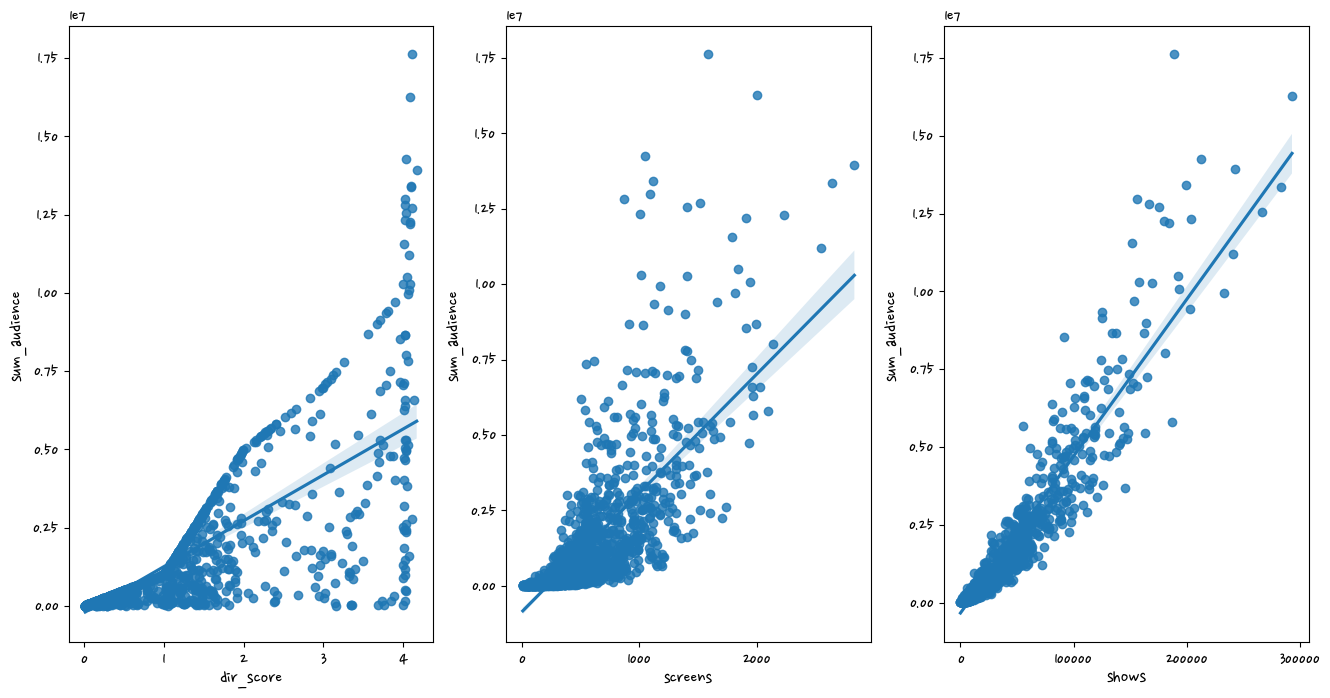

In [51]:
lm_features = ['dir_score', 'screens', 'shows']
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=1)
for i , feature in enumerate(lm_features):
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='sum_audience',data=dir_pre_data , ax=axs[i])

## 배우 지수

In [52]:
act_pre_data = dir_pre_data

In [53]:
act_pre_data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud,dir_score
1401,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,"액션,SF",D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",2011,0,654386,0.65
468,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"액션,어드벤처,스릴러",D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",2017,1,1129695,1.03


In [54]:
act_pre_data['act_pre_aud'] = act_pre_data['sum_audience'] # 이전 누적 관객수
act_pre_data['act_score'] = float(0.)

In [55]:
# 수정중
# for idx, row in act_pre_data.iterrows() :
#     try :
#         act1 = row.actor.split(',')[0]
#         act2 = row.actor.split(',')[1]
#     except:
#         act1 = row.actor.split(',')[0]
#         act1 = 'NaN'
        
#     print(act1,'/', act_pre_data[act_pre_data['actor'].str.contains(act1)].index)
#     print(act2, '/', act_pre_data[act_pre_data['actor'].str.contains(act2)].index)


In [56]:
# 티모시 올리펀트 / Int64Index([1401, 1510, 170], dtype='int64')
a_list = [1401, 1510, 170]
act_pre_data.loc[a_list]

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud,dir_score,act_pre_aud,act_score
1401,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,"액션,SF",D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",2011,0,654386,0.65,654386,0.0
1510,크레이지,2010-04-08,1104433000,143784,194,12578,미국,오버츄어 필름,(주)넥스트엔터테인먼트월드(NEW),청소년관람불가,"공포(호러),SF,스릴러",브렉 에이즈너,"티모시 올리펀트,라다 미첼,조 앤더슨,다니엘 파나베이커",2010,0,143784,0.14,143784,0.0
170,원스 어폰 어 타임... 인 할리우드,2019-09-25,2269807670,277319,678,15147,미국,NaN,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,청소년관람불가,"드라마,코미디",쿠엔틴 타란티노,"레오나르도 디카프리오,브래드 피트,마고 로비,에밀 허쉬,마가렛 퀄리,티모시 올리펀트...",2019,1,537463,0.54,277319,0.0


In [57]:
# act_grp_count['act01','act02'].get_group('제임스 코든').count()

# act_count2 = pd.DataFrame(act_pre_data.groupby('act02')['act02'].count().reset_index(name='count'))
# act_count2



# tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
# idx_list = list(tmp_data.index)
# idx_list

# # 수정중
# def dir_pre_add(dir_count, dir_pre_data): 
#     for i in range(0, 2):
#         name     = dir_count.loc[i,'director']  
#         count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
#         tmp_data = dir_pre_data[dir_pre_data['director']==name].sort_values(by=['opening_date'])
#         #print(f'name: {name}, count: {count}')
#         k = 0
#         if (count == len(tmp_data)):
#             for j in range(0, len(tmp_data)):
#                 if j == 0:
#                     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
#                 else :
#                     print(f'bef k:{k}')
#                     tmp_data.iloc[j,14] = j 
#                     tmp_data.iloc[j,15] = tmp_data.iloc[j]['dir_pre_aud'] + tmp_data.iloc[j-1]['dir_pre_aud']
#                     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
                
#         idx_list = list(tmp_data.index)
#         print(idx_list)
#         for i, idx in enumerate(idx_list):
#             print(i, idx, dir_pre_data.loc[idx,'dir_pre_cnt'], tmp_data.iloc[i]['dir_pre_cnt'], 
#                   dir_pre_data.loc[idx,'dir_pre_aud'], tmp_data.iloc[i]['dir_pre_aud'])
#             dir_pre_data.loc[idx,'dir_pre_cnt'] = tmp_data.iloc[i]['dir_pre_cnt']
#             dir_pre_data.loc[idx,'dir_pre_aud'] = tmp_data.iloc[i]['dir_pre_aud']

## 왓차 평점 붙이기

In [58]:
# data.info()

# from watcha2 import watchapedia

# movie_list = []
# for i in range(1, len(data)):
#     a_dict = { 'title': str(data.iloc[i]['title']) , 'year': str(data.iloc[i]['year'])}
#     movie_list.append(a_dict)

# #성공
# test_list = [{'title': '알라딘', 'year': '2019'}, {'title': '겨울왕국 2', 'year': '2019'}]
# #못찾음 , 왓차는 극한직업 2018 로 되어 이음
# test_list2 =  [{'title': '극한직업', 'year': '2019'}]
# test_list3 =  [{'title': '월ㆍE', 'year': '2008'}]

# w = watchapedia(test_list)
# a = w.getMovieUrl()
# mv_data = w.getMovieData()
# mv_data

## 네이버 영화정보, 평점, 주연 가져오기

In [59]:
import ast
import urllib.request

In [60]:
# 코드 가져오기
client_id = "zNy0lMSY0raZjZipmO_1"
client_secret = "ZlPl2DL9sf"

encText = urllib.parse.quote("미니언즈")
yearfrom = '2015'
yearto = '2015'

url = "https://openapi.naver.com/v1/search/movie.json?query=" + encText + '&yearfrom=' + yearfrom +  '&yearto=' + yearto # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)

request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)

response = urllib.request.urlopen(request)

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    data = ast.literal_eval(response_body.decode('utf-8'))
    print(data['items'][0]['link'].replace('\\', '').split('=')[1])
    
else:
    print("Error Code:" + rescode)

113351


In [61]:
from get import data
from get import ratings
from get import actor

ModuleNotFoundError: No module named 'get'

In [ ]:
codes = ['191634', '69105', '52420', '101062', '90834', '89294']
datas = []

for i in codes:
    temp_data = data(i)

    temp_ratings = ratings(i)
    temp_ratings = {'평점': temp_ratings}

    temp_actor = actor(i)
    temp_actor = {'주연': temp_actor}

    temp_data.update(temp_ratings)
    temp_data.update(temp_actor)
    datas.append(temp_data)

print(datas)